# LINEAR, RIDGE & LASSO REGRESSION MODELS

In [57]:
#importing the libraries

%matplotlib inline
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import matplotlib.pyplot as plt


# import test and train file

train = pd.read_csv('/Users/saurabhkarambalkar/Desktop/Assignment 5/BankCustomers.csv')

In [58]:
# importing linear regressionfrom sklearn

from sklearn.linear_model import LinearRegression
lreg = LinearRegression()


# splitting into training and cv for cross validation

from sklearn.model_selection import train_test_split
x = train.loc[:,['Age','Gender','Region','Job Classification']]
x_train, x_cv, y_train, y_cv = train_test_split(x,train.Balance)

In [59]:
# training the model

lreg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [60]:
# predicting on cv

pred = lreg.predict(x_cv)
pred

array([ 39387.96312445,  40353.8187397 ,  38768.44473764, ...,
        40590.86340367,  39427.10680492,  41364.62180477])

In [61]:
# calculating mse

mse1 = np.mean((pred - y_cv)**2)
mse1

834908003.2877784

In [72]:
# calculating r square

lreg.score(x_cv,y_cv)

-0.00022045505711387747

In [62]:
# calculating coefficients

coeff = DataFrame(x_train.columns)
coeff['Coefficient Estimate'] = Series(lreg.coef_)
coeff

,0,Coefficient Estimate
0,Age,39.507444
1,Gender,386.208436
2,Region,755.717678
3,Job Classification,-808.189603


#### Region has higher Coefficient Estimate than Age,Gender,Job Classification which means that higher effect on the Balance.

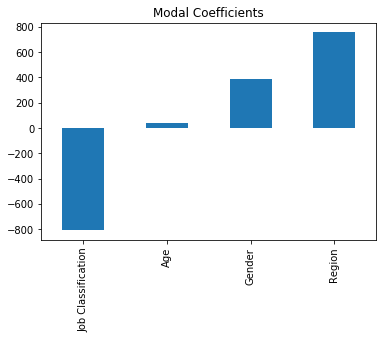

In [73]:
# checking the magnitude of coefficients

predictors = x_train.columns
coef = Series(lreg.coef_,predictors).sort_values()
coef.plot(kind='bar', title='Modal Coefficients')

In [74]:
# importing linear regressionfrom sklearn

from sklearn.linear_model import Ridge

# training the model

ridgeReg = Ridge(alpha=0.05, normalize=True)
ridgeReg.fit(x_train,y_train)
pred = ridgeReg.predict(x_cv)

# calculating mse

mse2 = np.mean((pred - y_cv)**2)
mse2

834835637.684605

In [75]:
## calculating score 

ridgeReg.score(x_cv,y_cv)

-0.00013376100668982538

In [76]:
# importing Lasso regressionfrom sklearn

from sklearn.linear_model import Lasso

# training the model

lassoReg = Lasso(alpha=0.3, normalize=True)
lassoReg.fit(x_train,y_train)
pred = lassoReg.predict(x_cv)

# calculating mse

mse3 = np.mean((pred - y_cv)**2)
mse3

834868878.1664033

In [77]:
lassoReg.score(x_cv,y_cv)

-0.00017358313044435469

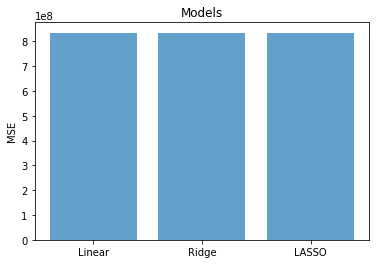

In [78]:
# Plotting the MSE

Models = ('Linear', 'Ridge', 'LASSO')
y_pos = np.arange(len(Models))
Performance = [mse1,mse2,mse3]
 
plt.bar(y_pos, Performance, align='center', alpha=0.7)
plt.xticks(y_pos, Models)
plt.ylabel('MSE')
plt.title('Models')
 
plt.show()

#### The MSE of Linear Model is  872541672.76
#### The MSE of Ridge Model is   872159278.32
#### The MSE of LASSO Model is 872387501.94

### Thus the most suited model is Ridge.

# Citation

https://www.analyticsvidhya.com/blog/2017/06/a-comprehensive-guide-for-linear-ridge-and-lasso-regression/